# Project 1 : Temperature homogenization in a building

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import matplotlib.animation as animation

## Definition of variables and fields

In [34]:
L = 3 #m
U0 = 1e-2 #m/s
D = 20e-6 #m2/s  
x = np.linspace(0,L,30) #m
y = np.linspace(0,L,30) #m
dx = x[1] - x[0]
dy = y[1] - y[0]

t = np.linspace(0,100,100) #s
dt = t[1]-t[0]

@jit(nopython=True)
def flowfield(x,y):
    ug = -U0*np.sin(4*np.pi*x/L)*np.cos(4*np.pi*y/L)
    vg = U0*np.cos(4*np.pi*x/L)*np.sin(4*np.pi*y/L)
    return ug,vg    



X,Y = np.meshgrid(x,y)
U,V = flowfield(X,Y)

## Plotting of flow field

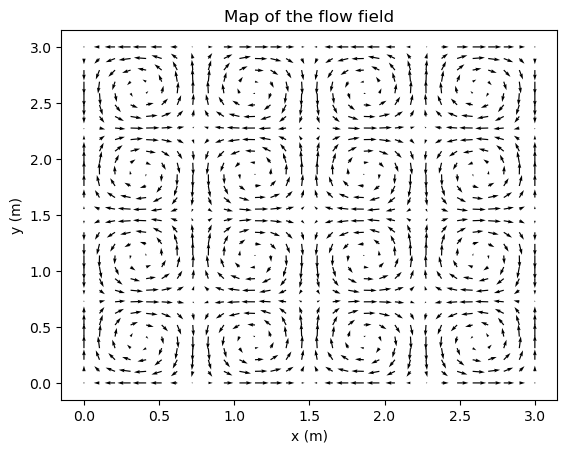

In [36]:
plt.figure()
plt.title('Map of the flow field')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.quiver(X,Y,U,V)
plt.show()

## Solving the equation

The equation to solve for $T$ is : $$\frac{\partial T}{\partial t} + u\frac{\partial T}{\partial x} + v \frac{\partial T}{\partial y} = D\left(\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} \right).$$

### Initial conditions

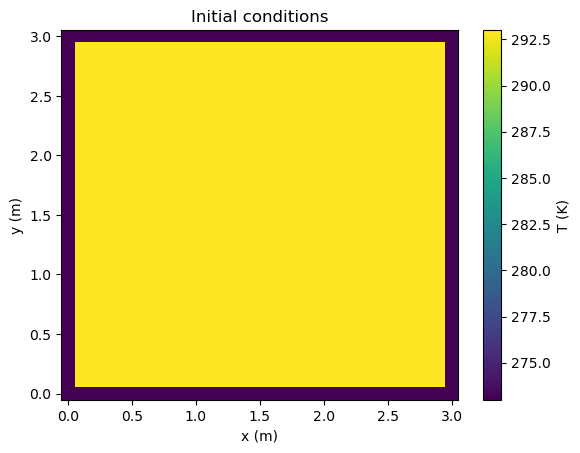

In [40]:
T = np.zeros((len(t),len(x),len(y)))
T[0,:,:] = 293 #K
T[:,0,:] = 273 #K
T[:,-1,:] = 273 #K
T[:,:,0] = 273 #K
T[:,:,-1] = 273 #K

plt.figure()
plt.title('Initial conditions')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.pcolormesh(X,Y,T[0])
plt.colorbar(label='T (K)')
plt.show()

## Integration scheme

### Forward Euler + Centered + Upwind

In [129]:
def iterate(T,n):
    for i in range(len(x)):
        for j in range(len(y)):
            udTdx = -U[i,j]*(T[n,i,j]-T[n,i-1,j])/dx
            vdTdy = -V[i,j]*(T[n,i,j]-T[n,i,j-1])/dy
            Dd2Tdx2 = D*(T[n,(i+1)%len(x),j]-2*T[n,i,j]+T[n,i-1,j])/dx**2
            Dd2Tdy2 = D*(T[n,i,(j+1)%len(y)] - 2*T[n,i,j] + T[n,i,j-1])/dy**2
    return T

for n in range(len(t)):
    iterate(T,n)


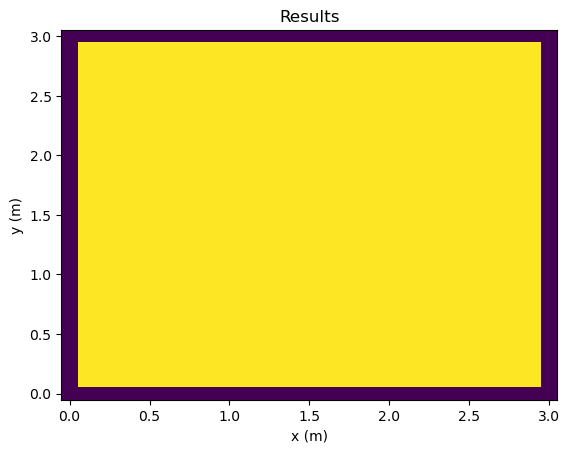

In [135]:
fig,ax = plt.subplots()
ax.set_title('Results')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
pcm = plt.pcolormesh(X,Y,T[0])
def update(frame) :
    Z = T([frame])
    pcm.set_array(Z.ravel())
    fig.colorbar(pcm,ax=ax)
ani = animation.FuncAnimation(fig=fig, func=update, frames=100, interval=30)
plt.show()